In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset loading

In [28]:
#df = pd.read_csv('ds//customer_supermarket.csv', sep='\t')
#del df['Unnamed: 0'] #drop the id column
df = pd.read_csv('../dataset/customer_supermarket.csv', sep='\t', index_col=0)
dim1 = df.shape[0]
print('The dataset contains', dim1, 'records')
df = df.drop_duplicates()
dim2 = df.shape[0]
print('After deleting the duplicates record there are', dim2, 'entries, for a total of', dim1 - dim2, 'duplicate records')
df

The dataset contains 471910 records
After deleting the duplicates record there are 466678 entries, for a total of 5232 duplicate records


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
471905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
471906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
471907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
471908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


## Basic statistics

In [29]:
df.dtypes

BasketID            object
BasketDate          object
Sale                object
CustomerID         float64
CustomerCountry     object
ProdID              object
ProdDescr           object
Qta                  int64
dtype: object

In [30]:
df['Sale'] = df['Sale'].str.replace(',', '.')
df['Sale'] = pd.to_numeric(df['Sale'])
df = df.astype({'BasketDate': 'datetime64',
                'CustomerID': 'object',
                'CustomerCountry': 'string',
                'ProdDescr': 'string'})

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466678 entries, 0 to 471909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         466678 non-null  object        
 1   BasketDate       466678 non-null  datetime64[ns]
 2   Sale             466678 non-null  float64       
 3   CustomerID       401605 non-null  object        
 4   CustomerCountry  466678 non-null  string        
 5   ProdID           466678 non-null  object        
 6   ProdDescr        465925 non-null  string        
 7   Qta              466678 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3), string(2)
memory usage: 32.0+ MB


In [32]:
df.isnull().any()

BasketID           False
BasketDate         False
Sale               False
CustomerID          True
CustomerCountry    False
ProdID             False
ProdDescr           True
Qta                False
dtype: bool

In [33]:
df.describe()

,Sale,Qta
count,466678.000000,466678.000000
mean,4.049057,10.806528
std,84.237135,232.627771
min,-11062.060000,-80995.000000
25%,1.250000,2.000000
50%,2.080000,4.000000
75%,3.750000,12.000000
max,38970.000000,80995.000000


## General observation
* BasketID:
    * it appears to be a six digit code.
    * it has no null value.
    * is it alwais a six digit code?
    * it has particular combination to indicate some particular values? (ex. 000000 for a null BasketID)
* BasketDate:
    * it indicates the date of the Baskets.
    * BasketDates corresponding to the same BasketsID have the same values.
    * what are the various distributions?
* Sale:
    * indicates the unit price of an item.
    * it has a large (~11000) negative value.
    * it has a large (~38000) positive value.
    * it has no null values.
    * does it have a particular value to indicate a missing value or one with a specific meaning?
    * does the same article have the same price over the years?
* Customer:
    * the customer is a six digit code

In [34]:
# TEST! Filtro Qta < 0
#df = df[df['Qta'] > 0]

# Obiettivo: tracciare il profilo del cliente
## Che informazioni possono essere utili?
* Informazioni sul cliente
    * Nazionalità
    * Orario della giornata
    * Frequenza giornaliera/settimanale/mensile
    * Quantità media di prodotti che acquista ogni volta
    * Quantità totale di prodotti acquistati
    * Quantità massima di prodotti acquistati
    * Spesa media giornaliera/settimanale/mensile
    * Prodotti acquistati
    * Frequenza prodotti acquistati
* Informazioni sul prodotto
    * Descrizione
    * Categoria (?)
    * Costo
    * Quantità media acquistata
    * Periodo di massimo acquisto (divisione settimanale?)
* Informazioni sulla data
    * Distribuzione affluenza
* Informazioni sul basket
    * Prodotti comprati insieme
    * Reso (?)
    * Debito (?)

# Extract CustomerID information

### There exist records with null CustomerID. Since we don't know whether those rows correspond to one or more customer, the first approach is to ignore them, considering only non-null ID's.
A future implementation could be to infer the customer's profile of them based on previous analisys.

In [35]:
df2 = df[df['CustomerID'].notnull()] # Extract all the non-null CustomerID

In [36]:
customers = pd.DataFrame({'CustomerID': df2['CustomerID'].unique()})
customers

,CustomerID
0,17850
1,13047
2,12583
3,13748
4,15100
...,...
4367,13436
4368,15520
4369,13298
4370,14569


## CustomerID info: extract number of baskets per costumer

In [37]:
print('There are', df2['BasketID'].unique().shape[0], 'distinct BasketID')
basks = df2.groupby(df['CustomerID'])['BasketID'].nunique()
for i, j in basks.sort_values(ascending=False).iteritems():
    print(f'{i:10}: ', j, '/', df2['BasketID'].unique().shape[0], sep='')

There are 22190 distinct BasketID
   14911.0: 248/22190
   12748.0: 224/22190
   17841.0: 169/22190
   14606.0: 128/22190
   13089.0: 118/22190
   15311.0: 118/22190
   12971.0: 89/22190
   14527.0: 86/22190
   13408.0: 81/22190
   14646.0: 77/22190
   16029.0: 76/22190
   16422.0: 75/22190
   14156.0: 66/22190
   13798.0: 63/22190
   18102.0: 62/22190
   13694.0: 60/22190
   17450.0: 55/22190
   15061.0: 55/22190
   16013.0: 54/22190
   15189.0: 53/22190
   13767.0: 52/22190
   17949.0: 52/22190
   15039.0: 52/22190
   17811.0: 51/22190
   12921.0: 50/22190
   12471.0: 49/22190
   16133.0: 46/22190
   17511.0: 46/22190
   14298.0: 45/22190
   13078.0: 43/22190
   17315.0: 43/22190
   13534.0: 43/22190
   17389.0: 43/22190
   17677.0: 43/22190
   13098.0: 41/22190
   13468.0: 41/22190
   17675.0: 41/22190
   13777.0: 41/22190
   13113.0: 40/22190
   17961.0: 39/22190
   16839.0: 39/22190
   13199.0: 39/22190
   15078.0: 38/22190
   12901.0: 36/22190
   13319.0: 36/22190
   13263.0: 35/

   14961.0: 12/22190
   14701.0: 12/22190
   15033.0: 11/22190
   13136.0: 11/22190
   17490.0: 11/22190
   16076.0: 11/22190
   17491.0: 11/22190
   18055.0: 11/22190
   18044.0: 11/22190
   15034.0: 11/22190
   17314.0: 11/22190
   12567.0: 11/22190
   12747.0: 11/22190
   12481.0: 11/22190
   18077.0: 11/22190
   17162.0: 11/22190
   17213.0: 11/22190
   18219.0: 11/22190
   12753.0: 11/22190
   16265.0: 11/22190
   15129.0: 11/22190
   13784.0: 11/22190
   14810.0: 11/22190
   14505.0: 11/22190
   13012.0: 11/22190
   12594.0: 11/22190
   16712.0: 11/22190
   17049.0: 11/22190
   15059.0: 11/22190
   15058.0: 11/22190
   13209.0: 11/22190
   17230.0: 11/22190
   13725.0: 11/22190
   17509.0: 11/22190
   16652.0: 11/22190
   15218.0: 11/22190
   17799.0: 11/22190
   17528.0: 11/22190
   17512.0: 11/22190
   13630.0: 11/22190
   13924.0: 11/22190
   13629.0: 11/22190
   17001.0: 11/22190
   12352.0: 11/22190
   15708.0: 11/22190
   15687.0: 11/22190
   15984.0: 11/22190
   16985.0: 1

   13941.0: 7/22190
   14178.0: 7/22190
   17744.0: 7/22190
   15453.0: 7/22190
   16466.0: 7/22190
   14004.0: 7/22190
   13953.0: 7/22190
   13246.0: 7/22190
   16841.0: 7/22190
   14267.0: 7/22190
   14443.0: 7/22190
   15426.0: 7/22190
   13650.0: 7/22190
   12562.0: 7/22190
   16434.0: 7/22190
   16871.0: 7/22190
   17669.0: 7/22190
   13623.0: 7/22190
   14404.0: 7/22190
   18177.0: 7/22190
   17287.0: 7/22190
   17284.0: 7/22190
   17519.0: 7/22190
   12409.0: 7/22190
   16143.0: 7/22190
   12463.0: 7/22190
   16283.0: 7/22190
   14215.0: 7/22190
   14214.0: 7/22190
   15563.0: 7/22190
   13509.0: 7/22190
   14064.0: 7/22190
   15505.0: 7/22190
   13499.0: 7/22190
   14507.0: 7/22190
   18171.0: 7/22190
   13717.0: 7/22190
   14210.0: 7/22190
   15038.0: 7/22190
   14209.0: 7/22190
   17288.0: 7/22190
   16170.0: 7/22190
   16173.0: 7/22190
   13437.0: 7/22190
   12347.0: 7/22190
   15706.0: 7/22190
   18272.0: 7/22190
   13758.0: 7/22190
   16633.0: 7/22190
   15105.0: 7/22190


   17667.0: 5/22190
   14916.0: 5/22190
   12754.0: 5/22190
   13217.0: 5/22190
   17317.0: 5/22190
   14684.0: 5/22190
   17979.0: 5/22190
   17692.0: 5/22190
   14442.0: 5/22190
   12502.0: 5/22190
   15267.0: 5/22190
   16891.0: 5/22190
   14859.0: 5/22190
   14440.0: 5/22190
   12518.0: 5/22190
   17770.0: 5/22190
   18016.0: 5/22190
   16907.0: 5/22190
   12530.0: 5/22190
   14698.0: 5/22190
   12557.0: 5/22190
   12536.0: 5/22190
   12539.0: 5/22190
   12781.0: 5/22190
   14447.0: 5/22190
   16933.0: 5/22190
   16938.0: 5/22190
   14875.0: 5/22190
   14692.0: 5/22190
   13265.0: 5/22190
   14691.0: 5/22190
   13015.0: 5/22190
   12616.0: 5/22190
   16869.0: 5/22190
   15172.0: 5/22190
   13162.0: 5/22190
   13159.0: 5/22190
   17115.0: 5/22190
   12714.0: 5/22190
   13157.0: 5/22190
   15181.0: 5/22190
   17738.0: 5/22190
   17827.0: 5/22190
   13145.0: 5/22190
   17131.0: 5/22190
   14959.0: 5/22190
   17731.0: 5/22190
   14498.0: 5/22190
   13079.0: 5/22190
   14506.0: 5/22190


   16496.0: 4/22190
   13308.0: 4/22190
   16833.0: 4/22190
   14449.0: 4/22190
   16416.0: 4/22190
   15297.0: 4/22190
   16759.0: 4/22190
   13396.0: 4/22190
   15321.0: 4/22190
   15406.0: 4/22190
   15407.0: 4/22190
   14277.0: 4/22190
   13614.0: 4/22190
   16539.0: 4/22190
   13611.0: 4/22190
   16806.0: 4/22190
   14285.0: 4/22190
   15289.0: 4/22190
   13240.0: 4/22190
   16816.0: 4/22190
   13247.0: 4/22190
   14460.0: 4/22190
   13539.0: 4/22190
   15237.0: 4/22190
   13592.0: 4/22190
   14287.0: 4/22190
   16951.0: 4/22190
   13329.0: 4/22190
   15394.0: 4/22190
   13301.0: 4/22190
   13064.0: 4/22190
   13476.0: 4/22190
   17454.0: 4/22190
   13475.0: 4/22190
   16205.0: 4/22190
   16206.0: 4/22190
   12930.0: 4/22190
   13455.0: 4/22190
   12933.0: 4/22190
   17429.0: 4/22190
   12937.0: 4/22190
   17423.0: 4/22190
   12940.0: 4/22190
   17411.0: 4/22190
   15525.0: 4/22190
   16669.0: 4/22190
   14352.0: 4/22190
   16217.0: 4/22190
   15530.0: 4/22190
   16224.0: 4/22190


   17616.0: 3/22190
   17618.0: 3/22190
   13236.0: 3/22190
   16969.0: 3/22190
   13242.0: 3/22190
   13249.0: 3/22190
   16960.0: 3/22190
   12808.0: 3/22190
   13255.0: 3/22190
   13258.0: 3/22190
   16950.0: 3/22190
   15713.0: 3/22190
   12798.0: 3/22190
   17033.0: 3/22190
   12822.0: 3/22190
   17146.0: 3/22190
   17044.0: 3/22190
   17545.0: 3/22190
   17548.0: 3/22190
   13140.0: 3/22190
   17119.0: 3/22190
   17550.0: 3/22190
   17557.0: 3/22190
   17564.0: 3/22190
   12829.0: 3/22190
   17083.0: 3/22190
   17580.0: 3/22190
   17080.0: 3/22190
   12827.0: 3/22190
   13174.0: 3/22190
   17584.0: 3/22190
   17076.0: 3/22190
   17064.0: 3/22190
   17058.0: 3/22190
   17588.0: 3/22190
   17590.0: 3/22190
   17047.0: 3/22190
   17045.0: 3/22190
   13587.0: 3/22190
   16589.0: 3/22190
   16454.0: 3/22190
   16079.0: 3/22190
   18150.0: 3/22190
   18158.0: 3/22190
   16049.0: 3/22190
   16048.0: 3/22190
   16041.0: 3/22190
   16040.0: 3/22190
   16037.0: 3/22190
   16034.0: 3/22190


   13885.0: 2/22190
   13888.0: 2/22190
   13899.0: 2/22190
   14179.0: 2/22190
   13904.0: 2/22190
   13917.0: 2/22190
   13918.0: 2/22190
   13930.0: 2/22190
   14164.0: 2/22190
   13525.0: 2/22190
   13519.0: 2/22190
   14326.0: 2/22190
   14331.0: 2/22190
   14497.0: 2/22190
   14496.0: 2/22190
   14495.0: 2/22190
   13151.0: 2/22190
   14491.0: 2/22190
   14488.0: 2/22190
   13165.0: 2/22190
   14483.0: 2/22190
   13166.0: 2/22190
   13169.0: 2/22190
   13173.0: 2/22190
   14481.0: 2/22190
   14479.0: 2/22190
   13189.0: 2/22190
   13192.0: 2/22190
   14474.0: 2/22190
   14473.0: 2/22190
   13207.0: 2/22190
   14470.0: 2/22190
   13221.0: 2/22190
   13223.0: 2/22190
   13233.0: 2/22190
   13235.0: 2/22190
   13248.0: 2/22190
   13253.0: 2/22190
   13133.0: 2/22190
   13122.0: 2/22190
   13121.0: 2/22190
   13030.0: 2/22190
   12944.0: 2/22190
   14539.0: 2/22190
   14538.0: 2/22190
   12962.0: 2/22190
   12981.0: 2/22190
   12982.0: 2/22190
   12991.0: 2/22190
   12995.0: 2/22190


   15109.0: 2/22190
   15103.0: 2/22190
   14896.0: 2/22190
   18071.0: 2/22190
   14902.0: 2/22190
   14904.0: 2/22190
   16629.0: 2/22190
   18072.0: 2/22190
   15092.0: 2/22190
   15091.0: 2/22190
   16634.0: 2/22190
   16835.0: 2/22190
   16836.0: 2/22190
   18078.0: 2/22190
   18080.0: 2/22190
   14918.0: 2/22190
   14920.0: 2/22190
   18084.0: 2/22190
   15123.0: 2/22190
   16763.0: 2/22190
   16620.0: 2/22190
   18040.0: 2/22190
   15182.0: 2/22190
   16602.0: 2/22190
   16603.0: 2/22190
   16825.0: 2/22190
   14882.0: 2/22190
   16956.0: 2/22190
   16611.0: 2/22190
   15171.0: 2/22190
   18034.0: 2/22190
   16766.0: 2/22190
   18156.0: 2/22190
   16616.0: 2/22190
   15124.0: 2/22190
   15154.0: 2/22190
   18220.0: 2/22190
   16619.0: 2/22190
   18048.0: 2/22190
   15147.0: 2/22190
   16828.0: 2/22190
   16952.0: 2/22190
   18217.0: 2/22190
   15139.0: 2/22190
   15135.0: 2/22190
   18053.0: 2/22190
   18085.0: 2/22190
   15071.0: 2/22190
   15184.0: 2/22190
   16647.0: 2/22190


   18022.0: 1/22190
   18019.0: 1/22190
   18015.0: 1/22190
   18014.0: 1/22190
   18011.0: 1/22190
   12531.0: 1/22190
   12532.0: 1/22190
   12573.0: 1/22190
   17962.0: 1/22190
   12638.0: 1/22190
   17960.0: 1/22190
   17908.0: 1/22190
   12611.0: 1/22190
   17906.0: 1/22190
   12614.0: 1/22190
   17901.0: 1/22190
   17899.0: 1/22190
   12617.0: 1/22190
   12618.0: 1/22190
   17896.0: 1/22190
   17895.0: 1/22190
   12622.0: 1/22190
   12623.0: 1/22190
   17893.0: 1/22190
   17891.0: 1/22190
   17887.0: 1/22190
   17885.0: 1/22190
   12631.0: 1/22190
   17881.0: 1/22190
   17880.0: 1/22190
   17911.0: 1/22190
   12605.0: 1/22190
   17914.0: 1/22190
   12587.0: 1/22190
   17958.0: 1/22190
   17957.0: 1/22190
   12580.0: 1/22190
   12581.0: 1/22190
   17956.0: 1/22190
   17948.0: 1/22190
   17947.0: 1/22190
   17942.0: 1/22190
   12588.0: 1/22190
   12603.0: 1/22190
   17941.0: 1/22190
   17939.0: 1/22190
   12591.0: 1/22190
   17936.0: 1/22190
   17925.0: 1/22190
   17923.0: 1/22190


   15360.0: 1/22190
   14351.0: 1/22190
   14353.0: 1/22190
   14355.0: 1/22190
   15523.0: 1/22190
   15528.0: 1/22190
   15766.0: 1/22190
   15678.0: 1/22190
   15705.0: 1/22190
   15703.0: 1/22190
   15699.0: 1/22190
   15692.0: 1/22190
   15691.0: 1/22190
   14117.0: 1/22190
   14119.0: 1/22190
   14124.0: 1/22190
   15683.0: 1/22190
   15677.0: 1/22190
   15717.0: 1/22190
   15670.0: 1/22190
   14130.0: 1/22190
   15668.0: 1/22190
   15667.0: 1/22190
   14139.0: 1/22190
   15663.0: 1/22190
   14142.0: 1/22190
   14143.0: 1/22190
   15659.0: 1/22190
   15709.0: 1/22190
   15720.0: 1/22190
   14148.0: 1/22190
   15740.0: 1/22190
   14068.0: 1/22190
   15758.0: 1/22190
   15753.0: 1/22190
   14076.0: 1/22190
   15748.0: 1/22190
   14079.0: 1/22190
   14080.0: 1/22190
   15744.0: 1/22190
   14082.0: 1/22190
   15739.0: 1/22190
   15721.0: 1/22190
   15733.0: 1/22190
   14089.0: 1/22190
   14090.0: 1/22190
   14093.0: 1/22190
   14098.0: 1/22190
   15728.0: 1/22190
   14100.0: 1/22190


   13398.0: 1/22190
   16761.0: 1/22190
   13439.0: 1/22190
   13366.0: 1/22190
   13354.0: 1/22190
   13355.0: 1/22190
   13356.0: 1/22190
   13357.0: 1/22190
   13358.0: 1/22190
   16796.0: 1/22190
   16795.0: 1/22190
   16793.0: 1/22190
   16789.0: 1/22190
   16784.0: 1/22190
   13395.0: 1/22190
   13372.0: 1/22190
   16776.0: 1/22190
   16773.0: 1/22190
   13382.0: 1/22190
   16769.0: 1/22190
   13385.0: 1/22190
   16765.0: 1/22190
   13390.0: 1/22190
   13391.0: 1/22190
   13436.0: 1/22190
   13441.0: 1/22190
   16563.0: 1/22190
   16583.0: 1/22190
   16597.0: 1/22190
   16595.0: 1/22190
   13503.0: 1/22190
   13504.0: 1/22190
   16594.0: 1/22190
   16591.0: 1/22190
   16587.0: 1/22190
   13508.0: 1/22190
   16586.0: 1/22190
   13512.0: 1/22190
   13494.0: 1/22190
   13513.0: 1/22190
   13514.0: 1/22190
   16582.0: 1/22190
   16579.0: 1/22190
   13518.0: 1/22190
   16574.0: 1/22190
   16569.0: 1/22190
   13522.0: 1/22190
   16565.0: 1/22190
   16601.0: 1/22190
   16610.0: 1/22190


In [39]:
customers['NumBaskets'] = customers['CustomerID'].map(basks)
customers

,CustomerID,NumBaskets
0,17850,35
1,13047,18
2,12583,18
3,13748,5
4,15100,6
...,...,...
4367,13436,1
4368,15520,1
4369,13298,1
4370,14569,1


In [40]:
# query to test
print(basks.loc[12346])
print(customers.loc[customers['CustomerID'] == 12346, 'NumBaskets'])
df2.loc[df2['CustomerID'] == 12346, :]

2
1169    2
Name: NumBaskets, dtype: int64


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
49519,541431,2011-01-18 10:01:00,1.04,12346,United Kingdom,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215
49524,C541433,2011-01-18 10:17:00,1.04,12346,United Kingdom,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215


### Some statistics about the baskets

In [52]:
print(customers['NumBaskets'].describe())
print('Mean: ', customers['NumBaskets'].mean())
print('Mode:', customers['NumBaskets'].mode())
print('Median:', customers['NumBaskets'].median())
print('Max:', customers['NumBaskets'].max())

count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: NumBaskets, dtype: float64
Mean:  5.07548032936871
Mode: 0    1
dtype: int64
Median: 3.0
Max: 248


## CustomerID info: extract nationality

### Search general information about the CustomerCountry
* How many countries are there?
* Are there any null value?
* Is there a special value for identify a missing value?

In [53]:
all(df2['CustomerCountry'].notnull()) # Rember that df2 is the dataframe without null customers

True

There are no null values.

In [54]:
print('There are', df2['CustomerCountry'].unique().shape[0], 'distinct value for the customer\'s country.')
dict_countr = {}
for val in df2['CustomerCountry'].unique():
    dict_countr[val] = df2[df2['CustomerCountry'] == val].shape[0]
for countr, freq in sorted(dict_countr.items(), key=lambda x: x[1], reverse=True): 
    print(f'{countr:23}: ', freq, '/', df2.shape[0], sep='')

There are 37 distinct value for the customer's country.
United Kingdom         : 356728/401605
Germany                : 9480/401605
France                 : 8476/401605
EIRE                   : 7475/401605
Spain                  : 2528/401605
Netherlands            : 2371/401605
Belgium                : 2069/401605
Switzerland            : 1877/401605
Portugal               : 1471/401605
Australia              : 1258/401605
Norway                 : 1086/401605
Italy                  : 803/401605
Channel Islands        : 757/401605
Finland                : 695/401605
Cyprus                 : 611/401605
Sweden                 : 461/401605
Austria                : 401/401605
Denmark                : 389/401605
Japan                  : 358/401605
Poland                 : 341/401605
USA                    : 291/401605
Israel                 : 247/401605
Unspecified            : 241/401605
Singapore              : 229/401605
Iceland                : 182/401605
Canada                 : 151/40

From the previous analisys it's possible to see that most of the rows (with nonnull CustomerID) have a CustomerCountry equal to 'United Kingdom'. Moreover exist values which aren't clear, in particular those values are 'European Community' and 'Unspecified'. While 'Unspecified' clearly indicates that a customer hasn't specified its country in the purchase of an item, the value 'European Community' is ambiguous.

### Are there any customer with multiple nationality?
If so, for every customer with more nationalities, search for the contry with the most number of purchase (baskets) and substitute it with the others.

From the fact that exist special values like 'Undefined' and 'European Community' some particular observation are necessary:
* if a customer is associated with a single country value, assign that value to the customer.
* if a customer have multiple countries associated, assign the the country with the most associated baskets (ATTENTION! not item purchased)
* if a customer have multiple countries associated and one (both) of them is (are) 'Undefined' or (and) 'European Community', then
    * if it has one or more countries different from 'Undefined' or 'European Community', assign the most frequent one
    * if it has only 'Undefined' or 'Eurpean Community' assign 'European Community'

In [55]:
dict_nats = {} # dictionary containing couple id: country 
groups = df2.groupby(df2['CustomerID']) # Group all the rows by CustomerID
for name, group in groups:
    basks = group['BasketID'].groupby(group['CustomerCountry']).unique() # For each customer, group the BasketID w.r.t. the country and count the number of unique values
    if basks.shape[0] > 1:
        print('The customer ', str(name), ' made:', sep='')
        countries = basks.index.tolist() # Is this even necessary?
        maxm = 0
        mcountr = ''
        for country in countries:
            #TODO: consider also 'European Community' and 'Undefined'
            if maxm < basks[country].shape[0]:
                mcountr, maxm = country, basks[country].shape[0]
            print('\t', basks[country].shape[0], ' purchase in ', country, sep='')
            # Choose the nationality with the greater number of purchase
        print('\tmax: ', maxm, ', country: ', mcountr, sep='')
        countries.remove(mcountr)
        print('\tlow countries: ', countries, sep='')
        df2.loc[df2['CustomerID'] == name, 'CustomerCountry'] = mcountr # NOT SURE! Maybe a better way
        dict_nats[name] = mcountr
    else:
        dict_nats[name] = basks.index[0]

The customer 12370.0 made:
	1 purchase in Austria
	3 purchase in Cyprus
	max: 3, country: Cyprus
	low countries: ['Austria']
The customer 12394.0 made:
	1 purchase in Belgium
	1 purchase in Denmark
	max: 1, country: Belgium
	low countries: ['Denmark']


C:\Users\property\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


The customer 12417.0 made:
	11 purchase in Belgium
	1 purchase in Spain
	max: 11, country: Belgium
	low countries: ['Spain']
The customer 12422.0 made:
	2 purchase in Australia
	1 purchase in Switzerland
	max: 2, country: Australia
	low countries: ['Switzerland']
The customer 12429.0 made:
	1 purchase in Austria
	3 purchase in Denmark
	max: 3, country: Denmark
	low countries: ['Austria']
The customer 12431.0 made:
	16 purchase in Australia
	2 purchase in Belgium
	max: 16, country: Australia
	low countries: ['Belgium']
The customer 12455.0 made:
	2 purchase in Cyprus
	4 purchase in Spain
	max: 4, country: Spain
	low countries: ['Cyprus']
The customer 12457.0 made:
	3 purchase in Cyprus
	9 purchase in Switzerland
	max: 9, country: Switzerland
	low countries: ['Cyprus']


In [56]:
customers['Country'] = customers['CustomerID'].map(dict_nats)
customers

,CustomerID,NumBaskets,Country
0,17850,35,United Kingdom
1,13047,18,United Kingdom
2,12583,18,France
3,13748,5,United Kingdom
4,15100,6,United Kingdom
...,...,...,...
4367,13436,1,United Kingdom
4368,15520,1,United Kingdom
4369,13298,1,United Kingdom
4370,14569,1,United Kingdom


### CustomerCountry statistics
Over all the customer with a specified CustomerID, compute some staitistics.

In [57]:
countr_freq = customers['CustomerID'].groupby(customers["Country"]).count().sort_values(ascending=False)
print('There is a total of', countr_freq.sum(), 'different customers')
print(countr_freq)

There is a total of 4372 different customers
Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     30
Belgium                   24
Switzerland               20
Portugal                  19
Italy                     15
Finland                   12
Norway                    10
Netherlands                9
Austria                    9
Channel Islands            9
Australia                  9
Denmark                    8
Japan                      8
Sweden                     8
Poland                     6
Cyprus                     6
Unspecified                4
Israel                     4
Greece                     4
USA                        4
Canada                     4
EIRE                       3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Czech Republic             1
Lithuania                  1
Singapore                  1
Saudi Arabia               1
Brazil             

In [58]:
countr_freq.median()

6.0

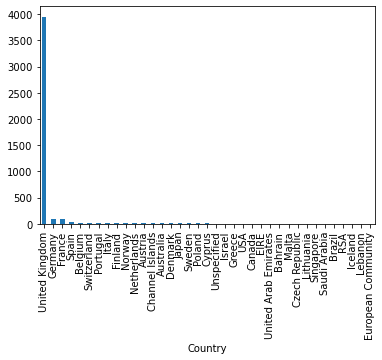

In [59]:
countr_freq.plot(kind='bar')

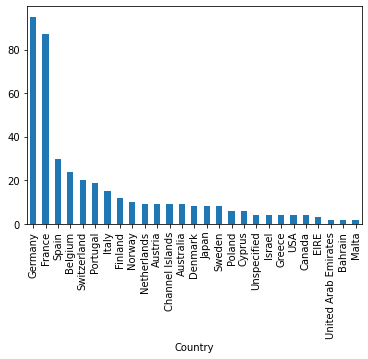

In [60]:
countr_freq['Germany':'Malta'].plot(kind='bar')

### Nationality and basket statistics
* Country with the greater number of baskets
* Country with the smallest number of baskets
* Average number of baskets per country

In [83]:
bask_nat = customers.groupby(customers['Country'])
bask_nat_sum = bask_nat['NumBaskets'].sum().sort_values(ascending=False)
bask_nat_sum

Country
United Kingdom          19857
Germany                   603
France                    458
EIRE                      319
Belgium                   119
Spain                     106
Netherlands               101
Switzerland                73
Australia                  72
Portugal                   70
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Austria                    17
Cyprus                     16
Singapore                  10
Malta                      10
Unspecified                 8
USA                         7
Iceland                     7
Greece                      6
Canada                      6
Israel                      6
European Community          5
Czech Republic              5
Lithuania                   4
United Arab Emirates        3
Saudi Arabia                2
Ba

In [89]:
bask_nat_sum.divide(countr_freq).sort_values(ascending=False)

Country
EIRE                    106.333333
Netherlands              11.222222
Singapore                10.000000
Australia                 8.000000
Iceland                   7.000000
Germany                   6.347368
Sweden                    5.750000
France                    5.264368
United Kingdom            5.027089
European Community        5.000000
Czech Republic            5.000000
Malta                     5.000000
Belgium                   4.958333
Poland                    4.000000
Norway                    4.000000
Lithuania                 4.000000
Finland                   4.000000
Portugal                  3.684211
Channel Islands           3.666667
Italy                     3.666667
Switzerland               3.650000
Spain                     3.533333
Japan                     3.500000
Cyprus                    2.666667
Denmark                   2.625000
Unspecified               2.000000
Saudi Arabia              2.000000
Austria                   1.888889
USA         

## CustomerID info: extract daytime frequency

First, contruct a map which associates an hour in the day with a category

### Search for the minimun and the maximum hours in which a customer made a purchase.

In [18]:
print(min(df['BasketDate'].dt.hour))
print(max(df['BasketDate'].dt.hour))

6
20


### Plot the distribution of the purchase over the hours

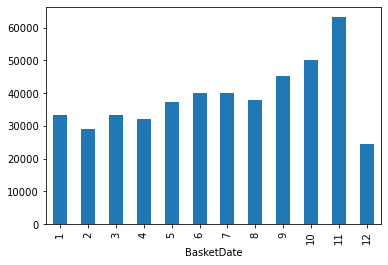

In [19]:
df['BasketDate'].groupby(df["BasketDate"].dt.month).count().plot(kind="bar")

# Baskets info

In [99]:
def good_bid(val):
    # Returns True is val is a good BasketID (i.e. six digit code), else False
    if len(val) == 6:
        if val.isnumeric():
            return True
    return False

In [100]:
gbid = df[df['BasketID'].apply(good_bid)]
bbid = df[~df['BasketID'].apply(good_bid)]

In [102]:
print('There are', gbid.shape[0], 'good BasketID and', bbid.shape[0], 'bad BasketID')

There are 457625 good BasketID and 9053 bad BasketID


In [105]:
gbid['BasketID'].nunique()

20871

In [106]:
bbid['BasketID'].nunique()

3756